<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn import svm
from sklearn.datasets import make_blobs

%matplotlib inline

### 1. Load Data

From UCI's Machine Learning Repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/


Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [6]:
breast_cancer_csv = '../../DATA/breast-cancer-wisconsin-data.csv'

df = pd.read_csv(breast_cancer_csv)

### 2. EDA

Explore dataset. Check for nulls. Make the target column binary.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
df.drop(['Unnamed: 32'], axis=1, inplace=True)

In [10]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'B' else 0)

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

In [25]:
seed = 42

X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)

print("Confusion matrix.......................\n", confusion_matrix(y_test, y_preds))
print("\n\nClassification report.....................\n", classification_report(y_test, y_preds))

Confusion matrix.......................
 [[39  4]
 [ 1 70]]


Classification report.....................
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



C:\Users\zive9\anaconda3\envs\iod\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

scores = cross_val_score(lr, X, y, cv=kf, scoring='accuracy')

print("Accuracy scores for cross-validation:", scores)
print("Average accuracy:", scores.mean())

Accuracy scores for cross-validation: [0.95614035 0.96491228 0.89473684 0.97368421 0.92920354]
Average accuracy: 0.943735444806707


C:\Users\zive9\anaconda3\envs\iod\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\zive9\anaconda3\envs\iod\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [28]:
# predict test class:
y_preds = lr.predict(X_test)

# predicted test probability:
probabilities = lr.predict_proba(X_test)

#### 3.3 Create the confusion matrix for your classifier's performance on the test set.

Convert confusion_matrix to a dataframe.

    columns=['predicted_healthy', 'predicted_cancer']
    index=['is_healthy', 'is_cancer']

In [31]:
# ANSWER

conf_matrix = confusion_matrix(y_test, y_preds)

cm_df = pd.DataFrame(conf_matrix, columns=['predicted_healthy', 'predicted_cancer'], index=['is_healthy', 'is_cancer'])
cm_df

,predicted_healthy,predicted_cancer
is_healthy,39,4
is_cancer,1,70


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?

    (TP + TN) / float(TP + TN + FP + FN)

In [34]:
# ANSWER
# use float to perform true division, not integer division

accuracy = (conf_matrix[1][1] + conf_matrix[0][0]) / float(conf_matrix[1][1] + conf_matrix[0][0] + conf_matrix[0][1] + conf_matrix[1][0])
accuracy

0.956140350877193

#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [35]:
# ANSWER

class_error = (conf_matrix[0][1] + conf_matrix[1][0]) / float(conf_matrix[1][1] + conf_matrix[0][0] + conf_matrix[0][1] + conf_matrix[1][0])
print("Misclassification error: ", class_error)

Misclassification error:  0.043859649122807015


#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN

    sensitivity = TP / float(FN + TP)

In [36]:
# ANSWER

recall = conf_matrix[1][1] / float(conf_matrix[0][1] + conf_matrix[1][1])
print("Recall: ", recall)

Recall:  0.9459459459459459


#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP

    specificity = TN / (TN + FP)

In [37]:
# ANSWER

spec = conf_matrix[0][0] / float(conf_matrix[0][0] + conf_matrix[1][0])
print("Specificity: ", spec)

Specificity:  0.975


#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [39]:
# ANSWER

fp = conf_matrix[0][1] / float(conf_matrix[0][0] + conf_matrix[1][0])
print("Flase positive rate: ", fp)

Flase positive rate:  0.1


#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [40]:
# ANSWER

precision = conf_matrix[1][1] / float(conf_matrix[1][1] + conf_matrix[0][1])
print("Precision: ", precision)

Precision:  0.9459459459459459


#### 3.10 Create a predicted test probability dataframe with column names 'class_0_pp','class_1_pp'

In [ ]:
# ANSWER
# Get the predicted probability vector and explicitly name the columns:)

In [49]:
probabilities = lr.predict_proba(X_test)

def get_class0(probabilities):
    class_0 = []
    for item in probabilities:
        class_0.append(item[0])
    return class_0

def get_class1(probabilities):
    class_1 = []
    for item in probabilities:
        class_1.append(item[1])
    return class_1

prob_df = pd.DataFrame({
    'class_0_pp': get_class0(probabilities),
    'class_1_pp': get_class1(probabilities)
})

prob_df

,class_0_pp,class_1_pp
0,0.129721,8.702793e-01
1,1.000000,8.675591e-10
2,0.998417,1.583416e-03
3,0.004044,9.959560e-01
4,0.000852,9.991480e-01
...,...,...
109,0.113313,8.866866e-01
110,0.999785,2.148684e-04
111,0.003266,9.967336e-01
112,0.815582,1.844179e-01


#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [50]:
from sklearn.metrics import roc_curve, auc

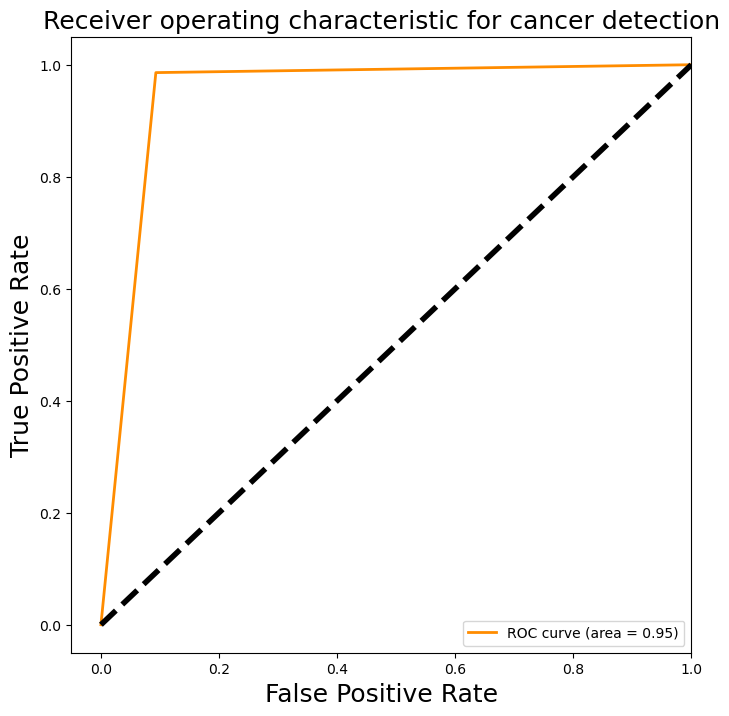

In [51]:
# For class 1, find the area under the curve
# Find fpr, tpr

fpr, tpr, thresholds = roc_curve(y_test, y_preds)

# Find auc
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

# Plot fpr, tpr
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



